In [115]:
path = "../logs/"

def read_log(file):
    temp = None
    with open(path + file, "r") as f:
        temp = eval(f.read())
    return temp
    
roberta = read_log("log_robert.txt")
codebert = read_log("log_codebert.txt")
unllama = read_log("unllama.txt")
llama = read_log("llama.txt")
uncodellama = read_log("uncodellama.txt")
codellama = read_log("codellama.txt")
t5_small_clf = read_log("t5-small.txt")
codet5_small_clf = read_log("codet5-small.txt")
t5_base_clf = read_log("t5-base.txt")
codet5_base_clf = read_log("codet5-base.txt")

t5_small_clf_conll = read_log("t5-small-conll.txt")
codet5_small_clf_conll = read_log("codet5-small-conll.txt")

type_loss = "loss"
legend_size = 20
fontsize = 20

In [116]:
def get_losses(dct, type_loss, cut):
    steps = [entry['step'] for entry in dct if type_loss in entry][:cut]
    losses = [entry[type_loss] for entry in dct if type_loss in entry][:cut]
    return steps, losses

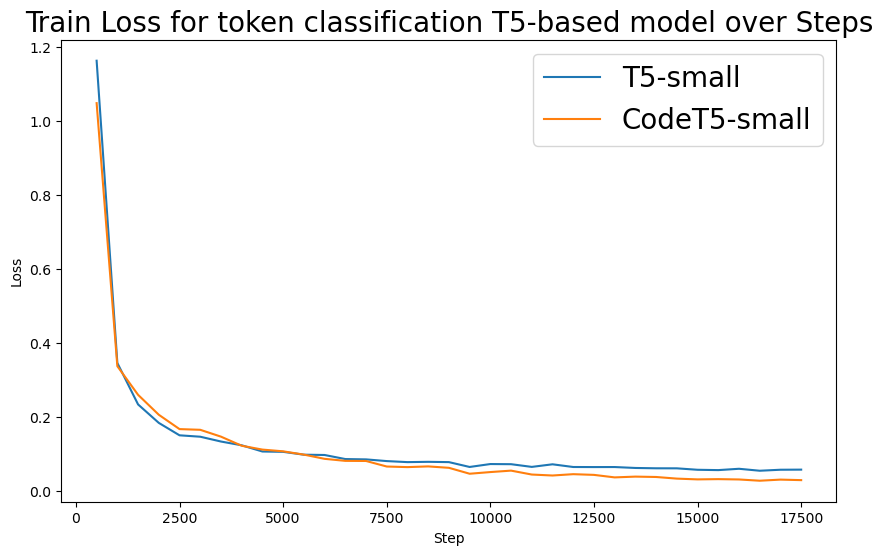

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
cut = None

steps, losses = get_losses(t5_small_clf_conll, type_loss, cut)
plt.plot(steps, losses, linestyle='-',  label="T5-small")

steps, losses = get_losses(codet5_small_clf_conll, type_loss, cut)
plt.plot(steps, losses, linestyle='-', label="CodeT5-small")

plt.title('Train Loss for token classification T5-based model over Steps', fontsize=fontsize)
plt.legend(prop={'size': legend_size})
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(False)
plt.show()

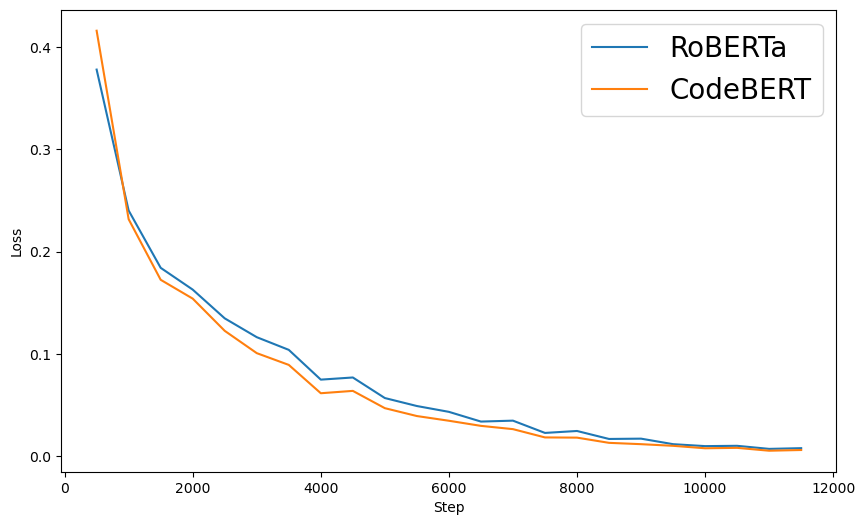

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
cut = None

steps, losses = get_losses(roberta, type_loss, cut)
plt.plot(steps, losses, linestyle='-',  label="RoBERTa")

steps, losses = get_losses(codebert, type_loss, cut)
plt.plot(steps, losses, linestyle='-', label="CodeBERT")

#plt.title('Train Loss for token classification RoBERTa-based models over steps', fontsize=fontsize - 2.5)
plt.legend(prop={'size': legend_size})
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(False)
plt.savefig(f"loss_bert.png", bbox_inches='tight', dpi=100)
plt.show()


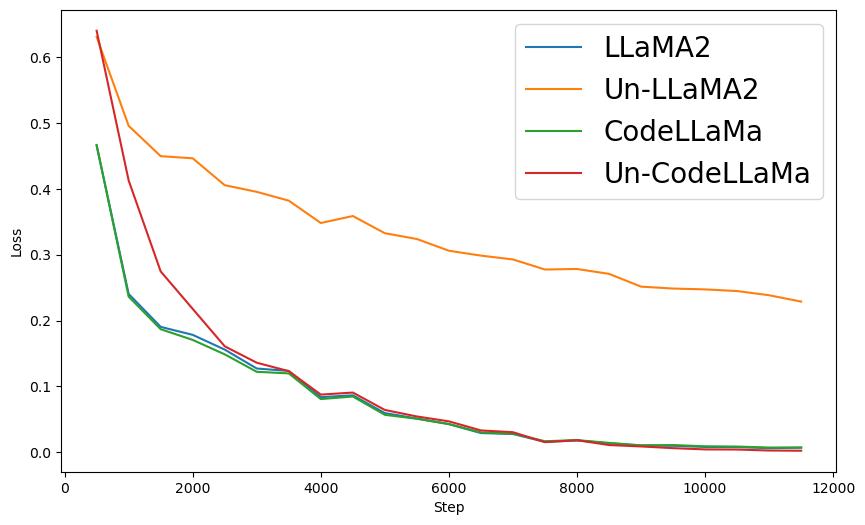

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
cut = None

steps, losses = get_losses(llama, type_loss, cut)
plt.plot(steps, losses, linestyle='-',  label="LLaMA2")

steps, losses = get_losses(unllama, type_loss, cut)
plt.plot(steps, losses, linestyle='-', label="Un-LLaMA2")

steps, losses = get_losses(codellama, type_loss, cut)
plt.plot(steps, losses, linestyle='-',  label="CodeLLaMa")

steps, losses = get_losses(uncodellama, type_loss, cut)
plt.plot(steps, losses, linestyle='-', label="Un-CodeLLaMa")

#plt.title('Train Loss for token classification LLaMA2-based models over steps', fontsize=fontsize - 3.2)
plt.legend(prop={'size': legend_size})
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(False)
plt.savefig(f"loss_llama.png", bbox_inches='tight', dpi=100)
plt.show()


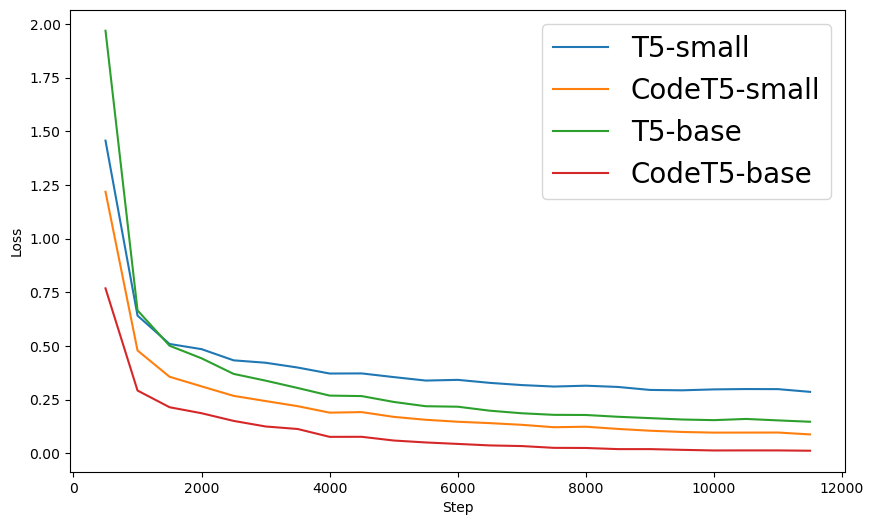

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
cut = None

steps, losses = get_losses(t5_small_clf, type_loss, cut)
plt.plot(steps, losses, linestyle='-',  label="T5-small")

steps, losses = get_losses(codet5_small_clf, type_loss, cut)
plt.plot(steps, losses, linestyle='-', label="CodeT5-small")

steps, losses = get_losses(t5_base_clf, type_loss, cut)
plt.plot(steps, losses, linestyle='-',  label="T5-base")

steps, losses = get_losses(codet5_base_clf, type_loss, cut)
plt.plot(steps, losses, linestyle='-', label="CodeT5-base")

#plt.title('Train Loss for token classification T5-based models over steps', fontsize=fontsize - 2)
plt.legend(prop={'size': legend_size})
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(False)
plt.savefig(f"loss_clf.png", bbox_inches='tight')
plt.show()


In [121]:
import pandas as pd
import numpy as np

t5_small_t2t = pd.read_csv(path + "t5-small-t2t.csv")
codet5_small_t2t = pd.read_csv(path + "codet5-small-t2t.csv")
t5_base_t2t = pd.read_csv(path + "t5-base-t2t.csv")
codet5_base_t2t = pd.read_csv(path + "codet5-base-t2t.csv")

type_loss = "train_loss_epoch" #"train_loss_step"
# type_loss = "val_loss_epoch" #"val_loss_step"

In [122]:
def get_losses_csv(pd_file, type_loss):
    losses = list(pd_file[~pd_file[type_loss].isna()][type_loss])
    steps = list(pd_file[~pd_file[type_loss].isna()]["step"])
    return steps, losses

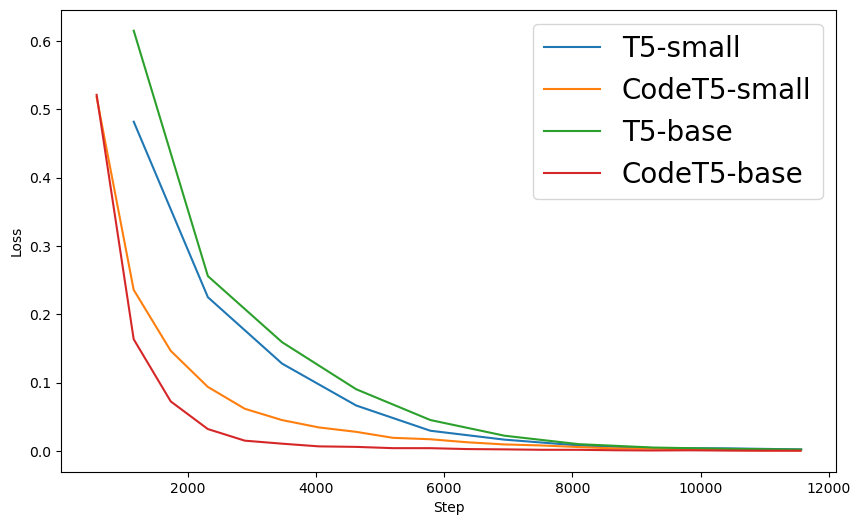

In [123]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
cut = None

steps, losses = get_losses_csv(t5_small_t2t, type_loss)
plt.plot(steps, losses, linestyle='-',  label="T5-small")

steps, losses = get_losses_csv(codet5_small_t2t, type_loss)
plt.plot(steps, losses, linestyle='-',  label="CodeT5-small")

steps, losses = get_losses_csv(t5_base_t2t, type_loss) 
plt.plot(steps, losses, linestyle='-',  label="T5-base")

steps, losses = get_losses_csv(codet5_base_t2t, type_loss)
plt.plot(steps, losses, linestyle='-',  label="CodeT5-base")

#plt.title('Train Loss for text-to-text T5-based models over steps', fontsize=fontsize)
plt.legend(prop={'size': legend_size})
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(False)
plt.savefig(f"loss_t2t.png", bbox_inches='tight', dpi=100)
plt.show()


In [46]:
import spacy
from spacy import displacy

nlp = spacy.blank('en')
raw_text = 'Your jar file should now run normally .'
doc = nlp.make_doc(raw_text)
spans = [[5, 8, "File_Type"]]
ents = []
colors = {"File_Type": "Aquamarine"}
options = {"ents": ["File_Type"], "colors": colors}
for span_start, span_end, label in spans:
    ent = doc.char_span(span_start, span_end, label=label)
    if ent is None:
        continue

    ents.append(ent)

doc.ents = ents
print("True label:")
displacy.render(doc, style="ent", jupyter=True, options=options)

raw_text = 'Your jar file should now run normally .'
doc = nlp.make_doc(raw_text)
spans = [[5, 8, "Version"]]
ents = []
colors = {"Version": "LightPink"}
options = {"ents": ["Version"], "colors": colors}
for span_start, span_end, label in spans:
    ent = doc.char_span(span_start, span_end, label=label)
    if ent is None:
        continue

    ents.append(ent)

doc.ents = ents
print()
print("Prediction label:")
displacy.render(doc, style="ent", jupyter=True, options=options)


True label:



Prediction label:


In [47]:
import spacy
from spacy import displacy

nlp = spacy.blank('en')
raw_text = 'Live demo on Shdr Editor .'
doc = nlp.make_doc(raw_text)
spans = [[13, 24, "Application"]]
ents = []
colors = {"Application": "Aquamarine"}
options = {"ents": ["Application"], "colors": colors}
for span_start, span_end, label in spans:
    ent = doc.char_span(span_start, span_end, label=label)
    if ent is None:
        continue

    ents.append(ent)

doc.ents = ents
print("True label:")
displacy.render(doc, style="ent", jupyter=True, options=options)

raw_text = 'Live demo on Shdr Editor .'
doc = nlp.make_doc(raw_text)
spans = [[13, 17, "Application"]]
ents = []
colors = {"Application": "LightPink"}
options = {"ents": ["Application"], "colors": colors}
for span_start, span_end, label in spans:
    ent = doc.char_span(span_start, span_end, label=label)
    if ent is None:
        continue

    ents.append(ent)

doc.ents = ents
print()
print("Prediction label:")
displacy.render(doc, style="ent", jupyter=True, options=options)


True label:



Prediction label:


In [5]:
from datasets import load_dataset
import os

dataset = load_dataset('json', data_files=os.path.join('..\data\StackOverflow\json', 'data_train.json'))
dataset["test"] = load_dataset('json', data_files=os.path.join('..\data\StackOverflow\json', 'data_test.json'))["train"]
dataset["validation"] = load_dataset('json', data_files=os.path.join('..\data\StackOverflow\json', 'data_dev.json'))["train"]

In [ ]:
'Live demo on Shdr Editor .' 'APP: Shdr Editor'
'Your jar file should now run normally .' 'FT: jar'

In [7]:
for i in range(1000):
    if len(dataset["validation"][i]["spans"]) > 0:
        print(dataset["validation"][i])
        print()

{'tokens': ['In', 'Java', '+', '=', 'operator', 'has', 'an', 'implicit', 'cast', 'to', 'the', 'left', 'hand', 'type', '.'], 'spans': ['LAN: Java', 'CB: + ='], 'ner_tags': [0, 23, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

{'tokens': ['As', 'everyone', 'already', 'stated', ',', 'the', '+', '=', 'has', 'an', 'implicit', 'cast', '.'], 'spans': ['CB: + ='], 'ner_tags': [0, 0, 0, 0, 0, 0, 5, 6, 0, 0, 0, 0, 0]}

{'tokens': ['And', 'a', 'table', 'of', 'their', 'meanings', ':'], 'spans': ['UIE: table'], 'ner_tags': [0, 0, 29, 0, 0, 0, 0]}

{'tokens': ['So', 'let', "'s", 'take', 'a', 'look', 'at', 'the', 'bytecode', 'from', 'some', 'simple', 'Java', 'code', ':'], 'spans': ['LAN: Java'], 'ner_tags': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 0, 0]}

{'tokens': ['My', 'comments', 'will', 'have', 'a', '//', 'in', 'front', '.'], 'spans': ['VAL: //'], 'ner_tags': [0, 0, 0, 0, 0, 33, 0, 0, 0]}

{'tokens': ['Say', ',', 'I', 'have', 'a', 'vector', 'name', '"', 'str', '"', ',', 'which', 'contain', 'many', '